In [60]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



In [63]:
url = "https://drive.google.com/file/d/14nr7lkB1_fF61Mba9mNgTnCeFlxBATnt/view?usp=sharing" # spotify list
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
'''
songs_original_df = pd.read_csv(path, 
                               sep=None, 
                               engine='python', 
                               quoting=3,
                               quotechar='"',
                      
                               on_bad_lines='skip', 
                     
                               skipinitialspace=bool)
'''
songs_original_df = pd.read_csv(path)


songs_original_df.columns = songs_original_df.columns.str.replace(' ', '')


to_drop=['Unnamed:0']


songs_original_df = songs_original_df.drop(columns=to_drop)  
songs_original_df = songs_original_df.drop_duplicates()


to_drop=[ 'key',
          'mode',
          'type',
          'duration_ms',
          'time_signature',
          'id',
          #'html',
          'artist',
          #'liveness',
          #'speechiness',
          #'loudness',
          #'energy',
         # 'acousticness',
          #'instrumentalness',
          #'valence',
          #'tempo',
          #'danceability'
    
         ]
        
songs_original_df = songs_original_df.drop(columns=to_drop)  
songs_original_df= songs_original_df.set_index(['name', 'html'])

songs_original_df = songs_original_df.drop_duplicates()


songs_original_df #= songs_orignal_df.head(50)

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.6580,0.25900,-13.141,0.0705,0.694,0.000059,0.9750,0.3060,110.376
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.7420,0.39900,-12.646,0.0346,0.217,0.000002,0.1070,0.6930,125.039
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.8510,0.73000,-11.048,0.3470,0.453,0.000063,0.1240,0.9050,93.698
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.7050,0.05020,-18.115,0.0471,0.879,0.000041,0.3860,0.5240,106.802
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.6510,0.11900,-19.807,0.0380,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.2020,0.06940,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.1880,0.10100,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,-42.959,0.0434,0.951,0.969000,0.0772,0.0344,71.573


In [65]:
songs_original_df.duplicated().sum()

0

In [66]:
songs_original_df = songs_original_df.drop_duplicates()

Min_Max_Scaler

In [67]:
songs = songs_original_df.copy()
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
min_max_df = my_min_max.fit_transform(songs)
min_max_scaled_df = min_max_df.copy()
# [['danceability','energy','loudness','acousticness','instrumentalness']]

Distance DF plot

In [7]:
'''
min_max_songs_distance = pd.DataFrame(pairwise_distances(min_max_df),
                                   index=songs_orignal_df.index,
                                   columns=songs_orignal_df.index)

# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(12, 8))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(min_max_songs_distance);
'''

'\nmin_max_songs_distance = pd.DataFrame(pairwise_distances(min_max_df),\n                                   index=songs_orignal_df.index,\n                                   columns=songs_orignal_df.index)\n\n# Create a figure with a size of 12 inches by 8 inches\nplt.subplots(figsize=(12, 8))\n\n# Generate a heatmap of the Euclidean distances DataFrame\nsns.heatmap(min_max_songs_distance);\n'

KMEANS

In [68]:
min_max_df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [69]:
my_kmeans = KMeans(n_clusters= 38, # you always choose the number of k here
                   n_init = "auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(min_max_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
min_max_df["playlist"] = clusters

#min_max_df.loc[min_max_df['playlist']==7,:]
min_max_df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist
name,html,,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,18
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,11
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,28
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,25
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,31
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,19
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,19
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,26


In [9]:
#min_max_df.groupby(by="playlist").mean()

In [70]:
centroids = my_kmeans.cluster_centers_
centroids_df=pd.DataFrame(centroids)
centroids_df

,0,1,2,3,4,5,6,7,8
0,0.348803,0.885566,0.868332,0.089331,0.017767,0.058200,0.187435,0.379345,0.502679
1,0.398186,0.129802,0.637531,0.050098,0.959792,0.896524,0.119702,0.183320,0.624582
2,0.238275,0.931711,0.844921,0.135605,0.008618,0.858941,0.180285,0.124381,0.479622
3,0.697271,0.583785,0.831394,0.068676,0.683333,0.012007,0.167943,0.855182,0.511340
4,0.788413,0.573353,0.860641,0.121885,0.095514,0.009766,0.138007,0.421383,0.542491
5,0.504937,0.836790,0.866362,0.060876,0.055193,0.423170,0.195691,0.551154,0.626732
6,0.699322,0.491055,0.833366,0.080500,0.475018,0.008291,0.142675,0.480795,0.500510
7,0.275867,0.132820,0.674033,0.047772,0.937929,0.056013,0.200111,0.133760,0.486971
8,0.582506,0.322624,0.722464,0.056469,0.856276,0.844716,0.194243,0.558739,0.530726
9,0.699069,0.736759,0.865722,0.073811,0.328798,0.005205,0.440083,0.833415,0.552023


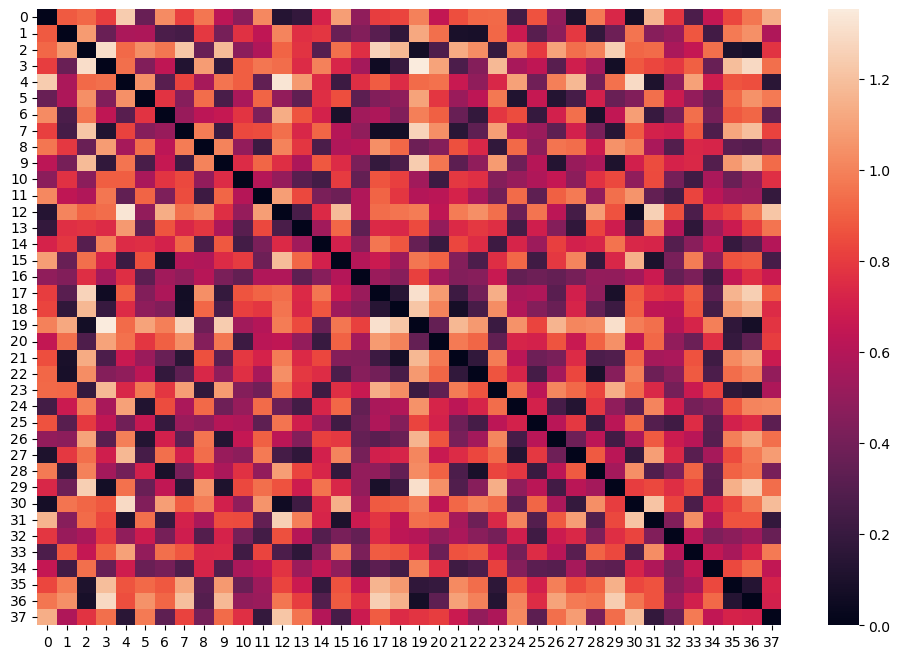

In [11]:

centroids_df_dist = pd.DataFrame(pairwise_distances(centroids_df))

# Create a figure with a size of 12 inches by 8 inches
plt.subplots(figsize=(12, 8))

# Generate a heatmap of the Euclidean distances DataFrame
sns.heatmap(centroids_df_dist);

In [12]:
#min_max_df.groupby('playlist')['danceability'].count()

In [13]:
#min_max_df.loc[min_max_df['playlist']==5,:]

In [71]:
min_max_scaled_df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [72]:
min_max_df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist
name,html,,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,18
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,11
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,28
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,25
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,31
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,19
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,19
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,26


In [73]:
dict2 = []
k_min =20
k_max = 60
seed= 234
for k in range(k_min,k_max):
    my_kmeans2 = KMeans(n_clusters= k, # you always choose the number of k here
                    n_init = "auto",
                    random_state = seed)
    
    # Fit the model to the data
    my_kmeans2.fit(min_max_scaled_df)
    labels = my_kmeans2.labels_

    score = silhouette_score(min_max_scaled_df, labels)
    dict2.append(score)


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


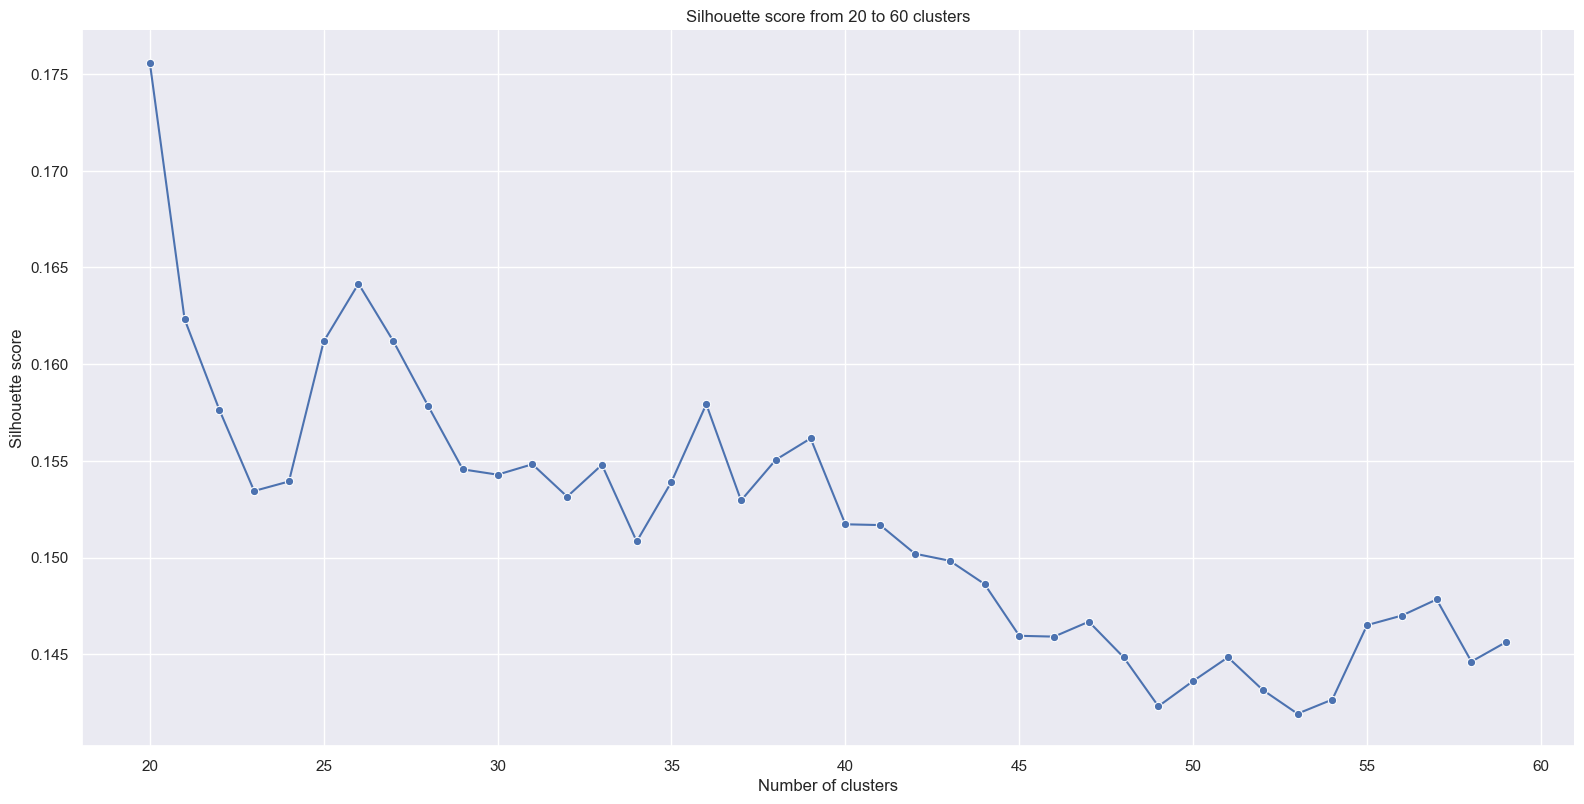

In [74]:
sns.set_theme(style='darkgrid')
(
sns.relplot(y=dict2,
            x=range(k_min,k_max),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from {k_min} to {k_max} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
)

Inertia and elbow method

In [76]:
min_max_scaled_df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


In [77]:

inertia_list = [] # empty list to append via loop

for i in range(2, k_max):
    myKMeans_inertia = KMeans(n_clusters = i,
                      n_init='auto',
                      random_state=seed)
    myKMeans_inertia.fit(min_max_scaled_df)
    inertia_list.append(myKMeans_inertia.inertia_)

inertia_list

[1832.767966336278,
 1236.0737469756418,
 986.763899471505,
 803.270205763588,
 768.9568317371604,
 730.8068476967633,
 657.0040035037573,
 623.9677287223902,
 603.1971868340994,
 584.9591434977268,
 563.2360141165842,
 551.5422067286613,
 535.4476887852154,
 526.708246744824,
 515.834272368999,
 502.7115340234935,
 492.67893554403236,
 484.03573792152395,
 467.13997173620515,
 467.92284563563214,
 462.1852650246117,
 456.3514220364505,
 449.8411767857037,
 434.9488888804304,
 427.91725737767774,
 422.4330379648344,
 411.27673305305655,
 407.9396611909842,
 403.6451133714648,
 398.8141625791378,
 396.65794369576565,
 390.960665350474,
 390.11780790432226,
 382.3213064153497,
 374.4597646565418,
 373.69919967463943,
 369.32871590588525,
 365.12443208613627,
 363.7156679225172,
 356.357457261607,
 355.12129282906255,
 350.84139899409763,
 348.16740350751536,
 345.61074470295,
 342.5001544389191,
 340.2805190095108,
 338.3665003595344,
 335.52524968630365,
 333.43126457365815,
 330.324822

plot it

In [78]:
min_max_scaled_df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,html,,,,,,,,,
Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",https://open.spotify.com/track/1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",https://open.spotify.com/track/1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",https://open.spotify.com/track/2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


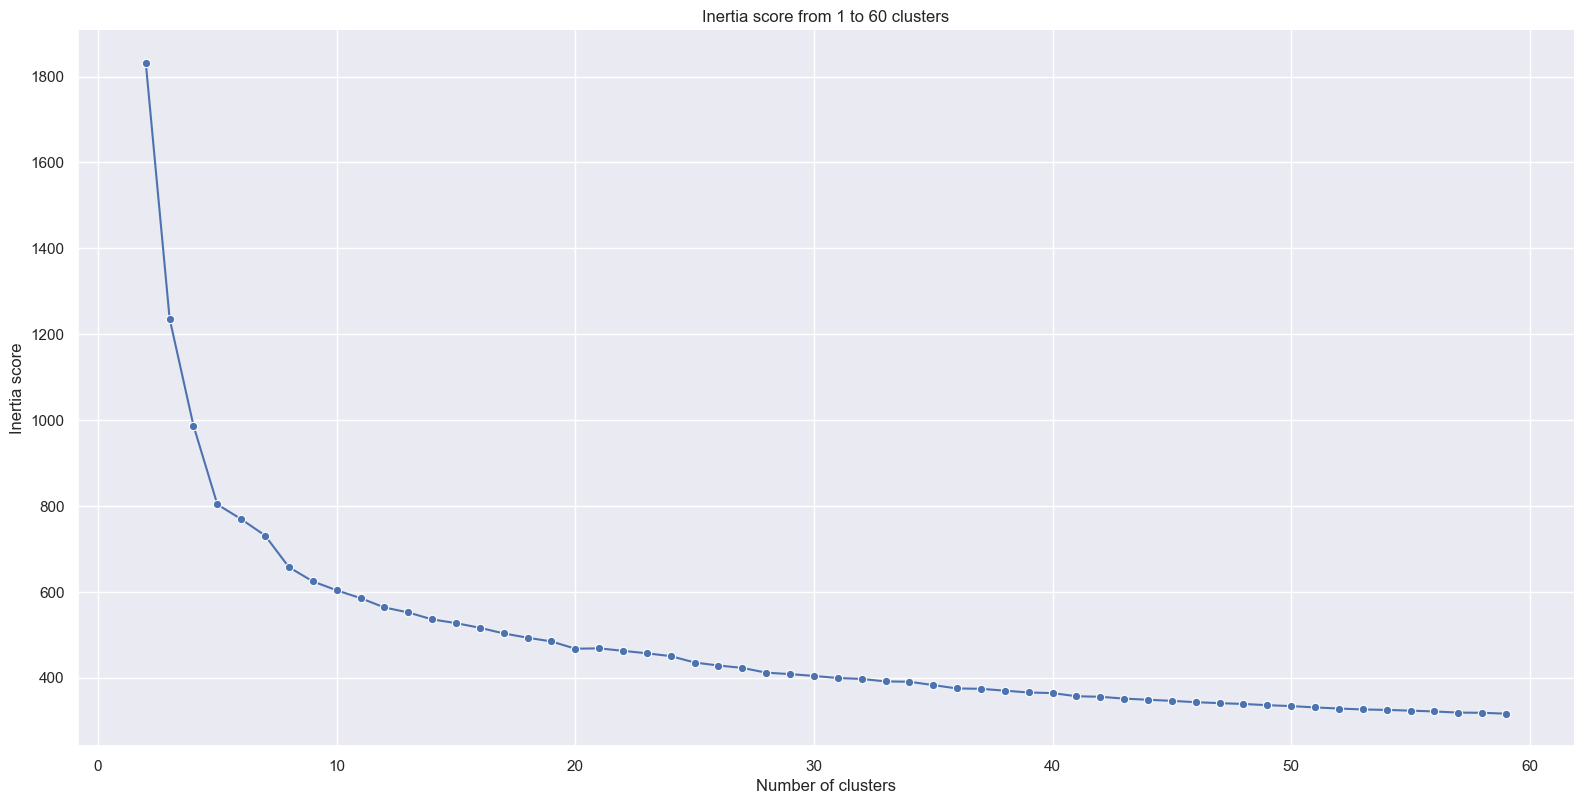

In [79]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(2,k_max),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {k_max} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
)

In [81]:
min_max_df.groupby('playlist').count()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
playlist,,,,,,,,,
0,113,113,113,113,113,113,113,113,113
1,210,210,210,210,210,210,210,210,210
2,246,246,246,246,246,246,246,246,246
3,130,130,130,130,130,130,130,130,130
4,144,144,144,144,144,144,144,144,144
5,62,62,62,62,62,62,62,62,62
6,127,127,127,127,127,127,127,127,127
7,113,113,113,113,113,113,113,113,113
8,67,67,67,67,67,67,67,67,67


In [82]:
metallica_playlist = min_max_df.loc[min_max_df['playlist']==12].copy()
metallica_playlist.sample(20)

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist
name,html,,,,,,,,,,
Someone Else's Song,https://open.spotify.com/track/5JzmWgTgVsTylZOMYxk26C,0.378490,0.256,0.741531,0.037691,0.791165,0.453807,0.105370,0.391878,0.761582,12
"Straight, No Chaser",https://open.spotify.com/track/6YYu8qFzcY1ZyzzsJIQM12,0.480869,0.350,0.766571,0.043900,0.411647,0.283249,0.136778,0.629442,0.436170,12
Foolin' Myself,https://open.spotify.com/track/1M0bEJicvT2qmdJej9wjyk,0.509824,0.295,0.724854,0.053268,0.539157,0.244670,0.244174,0.493401,0.465344,12
Maria Bethânia,https://open.spotify.com/track/4GldaY02BCVmDp82TU1Cpg,0.641158,0.484,0.757165,0.194989,0.840361,0.361421,0.100507,0.646701,0.610360,12
Água de beber,https://open.spotify.com/track/2bQ3ARYaM7JlYOpofCtlft,0.797311,0.555,0.776532,0.053704,0.874498,0.428426,0.083992,0.561421,0.458405,12
Train To Skaville,https://open.spotify.com/track/466HPqJP2wrgOyI222XvPs,0.816960,0.228,0.746275,0.224401,0.214859,0.503553,0.315096,0.629442,0.409426,12
Windows,https://open.spotify.com/track/0m8tSPLHhjhGToD6LW0RPp,0.520165,0.344,0.667993,0.040196,0.675703,0.386802,0.097264,0.475127,0.506982,12
Until The Real Thing Comes Along,https://open.spotify.com/track/4F0sSQCicLl5tme407ubvS,0.517063,0.208,0.746063,0.080937,0.772088,0.503553,0.376900,0.468020,0.845142,12
Sunset,https://open.spotify.com/track/7DImv0qWPEiAYUPJ0yKuDd,0.863495,0.182,0.719311,0.083007,0.559237,0.462944,0.114488,0.374619,0.560680,12


In [88]:
opera_playlist = min_max_df.loc[min_max_df['playlist']==12
               ].copy()
opera_playlist

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist
name,html,,,,,,,,,,
Madalena,https://open.spotify.com/track/33u3dO0JWjerYpFN61J3ug,0.698035,0.2070,0.752828,0.059368,0.966867,0.420305,0.113475,0.694416,0.437081,12
Previsao,https://open.spotify.com/track/5iKuMCDh634YGrg2HrhtHp,0.697001,0.8640,0.848179,0.041612,0.643574,0.363452,0.140831,0.544162,0.467288,12
Só Danço Samba,https://open.spotify.com/track/4Wzym5Rbnn8Ny8rFqEObm1,0.631851,0.2790,0.781976,0.060349,0.841365,0.444670,0.132725,0.687310,0.381074,12
Felicia and Bianca,https://open.spotify.com/track/0OSEW45vRnj45QdIpV1NY4,0.594623,0.2740,0.675247,0.051416,0.688755,0.348223,0.103343,0.637563,0.493846,12
Água de beber,https://open.spotify.com/track/2bQ3ARYaM7JlYOpofCtlft,0.797311,0.5550,0.776532,0.053704,0.874498,0.428426,0.083992,0.561421,0.458405,12
Maria Bethânia,https://open.spotify.com/track/4GldaY02BCVmDp82TU1Cpg,0.641158,0.4840,0.757165,0.194989,0.840361,0.361421,0.100507,0.646701,0.610360,12
Warm Shadow,https://open.spotify.com/track/3jWwXvWrJ1eFPCUrXJdR3E,0.763185,0.5560,0.790568,0.043137,0.637550,0.249746,0.113475,0.290355,0.469751,12
Sort Of Revolution,https://open.spotify.com/track/6WxHYIG5AQSLOtZmKaBWHV,0.735264,0.2740,0.698217,0.038671,0.700803,0.506599,0.083384,0.213198,0.677723,12
Something About Us,https://open.spotify.com/track/1NeLwFETswx8Fzxl2AFl91,0.904860,0.4750,0.771527,0.107407,0.441767,0.730964,0.046606,0.389848,0.467115,12


In [24]:
new_df  = min_max_df.groupby('playlist').mean().sort_values(by='acousticness', ascending=False)

In [25]:
new_df['sum'] = new_df['acousticness']+ new_df['instrumentalness']
new_df.sort_values(by='sum', ascending=False).head(2)

,acousticness,instrumentalness,sum
playlist,,,
19,0.989483,0.938921,1.928404
2,0.920365,0.934306,1.854671


In [26]:
new_df['acc'] = new_df['acousticness'] - new_df['instrumentalness']
new_df.sort_values(by='acc', ascending=False).head(2)

,acousticness,instrumentalness,sum,acc
playlist,,,,
4,0.953289,0.008535,0.961824,0.944754
31,0.843277,0.005424,0.848701,0.837854


In [27]:
new_df['instr'] =  new_df['instrumentalness']-new_df['acousticness'] 
new_df.sort_values(by='instr', ascending=False).head(2)

,acousticness,instrumentalness,sum,acc,instr
playlist,,,,,
12,0.006286,0.941158,0.947444,-0.934872,0.934872
30,0.002921,0.883849,0.886770,-0.880928,0.880928
